<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/Delhivery_CaseStudy_Mariya_DSMLJune22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

##### Delhivery Team wants to process the data from data engineering pipeline to,
*   get useful features out of raw fields
*   make sense out of the data to enable data science team to build forecasting models



#### Importing requied libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#### Read the Data

In [2]:
# Read the dataset
dvery_df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")

#### Metadata of Delhivery Data

In [3]:
# Description of the dataset
dvery_df.describe(include='all')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,...,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,...,93180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,...,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,...,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000


In [4]:
# Meta data of the dataset
dvery_df.info

<bound method DataFrame.info of             data          trip_creation_time  \
0       training  2018-09-20 02:35:36.476840   
1       training  2018-09-20 02:35:36.476840   
2       training  2018-09-20 02:35:36.476840   
3       training  2018-09-20 02:35:36.476840   
4       training  2018-09-20 02:35:36.476840   
...          ...                         ...   
144862  training  2018-09-20 16:24:28.436231   
144863  training  2018-09-20 16:24:28.436231   
144864  training  2018-09-20 16:24:28.436231   
144865  training  2018-09-20 16:24:28.436231   
144866  training  2018-09-20 16:24:28.436231   

                                      route_schedule_uuid route_type  \
0       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4       thanos::sroute:eb7bfc78

In [5]:
# Top 5 rows of the dataset
dvery_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [6]:
# List of columns in the dataset
dvery_df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [7]:
# Datatypes of the columns
dvery_df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [8]:
# Shape of the dataset
dvery_df.shape
print('Delhivery dataset has {} rows and {} columns'.format(dvery_df.shape[0], dvery_df.shape[1]))

Delhivery dataset has 144867 rows and 24 columns


In [9]:
# Size of the dataset
dvery_df.size

3476808

##### **Observation**: *Delhivery dataset has 1.4 lakhs plus records and 24 columns*

# Data Pre-Processing

##### 1. Check for Missing Values
##### 2. Exploring Numerical values
##### 3. Exploreing Categorical Values

In [10]:
dvery_df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [11]:
[features for features in dvery_df.columns if dvery_df[features].isnull().sum()>0]

['source_name', 'destination_name']

##### **Observation**: *Source name & Destination name have lot of null values*

In [12]:
# Take a working copy of the given dataset
work_df = dvery_df.copy()

In [13]:
work_df.size

3476808

In [14]:
work_df.shape

(144867, 24)

In [15]:
# Null values Count & Percentage
work_df.isnull().sum()
print(round(work_df.isnull().sum()/work_df.shape[0]*100,2))

data                              0.00
trip_creation_time                0.00
route_schedule_uuid               0.00
route_type                        0.00
trip_uuid                         0.00
source_center                     0.00
source_name                       0.20
destination_center                0.00
destination_name                  0.18
od_start_time                     0.00
od_end_time                       0.00
start_scan_to_end_scan            0.00
is_cutoff                         0.00
cutoff_factor                     0.00
cutoff_timestamp                  0.00
actual_distance_to_destination    0.00
actual_time                       0.00
osrm_time                         0.00
osrm_distance                     0.00
factor                            0.00
segment_actual_time               0.00
segment_osrm_time                 0.00
segment_osrm_distance             0.00
segment_factor                    0.00
dtype: float64


##### **Observation**: *Source name has 2% null value & Destination name has 0.18% null values*

In [16]:
# Total number of missing values from the entire dataset
work_df.isnull().sum().sum()

554

In [17]:
def missing_values_per_column():
  col_count = 0
  print("Columns with missing values and the missing values Percentage: \n")
  for col in work_df.columns:
    count = work_df[work_df[col].isna()].shape[0]
    if count>0:
      print(col + ' : ' + str(round((count/work_df.shape[0])*100, 2))+ '%')
      col_count = col_count + 1
  if col_count == 0:
    print("There are no missing values in any rows")
  
missing_values_per_column()

Columns with missing values and the missing values Percentage: 

source_name : 0.2%
destination_name : 0.18%


In [41]:
# Missing Values Treatment. As the % of null values are relatively low, let's drop them. 
work_df.dropna(inplace=True)

In [42]:
missing_values_per_column()

Columns with missing values and the missing values Percentage: 

There are no missing values in any rows


In [44]:
# Removing some of the non-significant columns
work_df.drop(columns=['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'],inplace=True)

In [39]:
# Converting few fields into right datatypes. For eg: trip_creation_time, od_start_time, od_end_time with date and time as values but have datatype as object
work_df['trip_creation_time'] = pd.to_datetime(work_df['trip_creation_time'])
work_df['od_start_time'] = pd.to_datetime(work_df['od_start_time'])
work_df['od_end_time'] = pd.to_datetime(work_df['od_end_time'])

In [54]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [65]:
work_df[['cumulative_segment_actual_time', 'cumulative_segment_osrm_time', 'cumulative_segment_osrm_distance']] = work_df.groupby(['trip_uuid', 'source_center', 'destination_center']).agg([sum('trip_uuid')])

TypeError: ignored

In [20]:
# Segregating Categorical and Numerical Features
cat_features = [x for x in work_df.columns if work_df[x].dtype == 'object'] 
num_features = [y for y in work_df.columns if work_df[y].dtype not in ('object','datetime64[ns]')]

In [21]:
cat_features

['data',
 'trip_creation_time',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'od_start_time',
 'od_end_time',
 'cutoff_timestamp']

In [22]:
num_features

['start_scan_to_end_scan',
 'is_cutoff',
 'cutoff_factor',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor']

#### Extract & Build new Features
###### Destination Name, Source Name and Trip Creation Time

In [23]:
# Extract Destination Name
Dest_Name = []
for name in work_df['destination_name']:
  name = str(name).split('_')
  Dest_Name.append(name[0])

In [24]:
# Add extracted destination name to the the dataset
work_df['Dest_Name'] = Dest_Name

In [25]:
# Extract Source Name
Src_Name = []
for name in work_df['source_name']:
  name = str(name).split(' (')
  Src_Name.append(name[0])

In [26]:
# Add extracted source name to the the dataset
work_df['Src_Name'] = Src_Name

In [27]:
# Extract Date Month and Year from Trip Creation Time
temp_date = []
for dateVal in work_df['trip_creation_time']:
  dt = datetime.strptime(dateVal, '%Y-%m-%d %H:%M:%S.%f')
  temp_date.append(str(dt.day) + ' ' + str(dt.month) + ' ' + str(dt.year))

In [28]:
# Add extracted day, month and year to the dataset
work_df['Trip_Creation_Time_New'] = temp_date

In [29]:
# Verifying the newly added features
work_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,Dest_Name,Src_Name,Trip_Creation_Time_New
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Khambhat,Anand_VUNagar_DC,20 9 2018
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Khambhat,Anand_VUNagar_DC,20 9 2018
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Khambhat,Anand_VUNagar_DC,20 9 2018
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Khambhat,Anand_VUNagar_DC,20 9 2018
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Khambhat,Anand_VUNagar_DC,20 9 2018


In [30]:
start_date = datetime.strptime(work_df['od_start_time'][0], '%Y-%m-%d %H:%M:%S.%f')
end_date = datetime.strptime(work_df['od_end_time'][0], '%Y-%m-%d %H:%M:%S.%f')
duration = abs((end_date - start_date).total_seconds())
duration_in_mins = round(duration/60)
print(duration_in_mins)

86


In [31]:
# Find the Start to End duration and add to the dataset
duration_in_mins = []
for i in range(len(work_df)):
  start_date = datetime.strptime(work_df['od_start_time'][i], '%Y-%m-%d %H:%M:%S.%f')
  end_date = datetime.strptime(work_df['od_end_time'][i], '%Y-%m-%d %H:%M:%S.%f')
  duration = abs((end_date - start_date).total_seconds())
  duration_in_mins.append(round(duration/60))

In [32]:
work_df['Duration_In_Mins'] = duration_in_mins

In [33]:
work_df.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,Dest_Name,Src_Name,Trip_Creation_Time_New,Duration_In_Mins
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,67.9280,1.566667,12.0,12.0,8.1858,1.000000,Gurgaon,Sonipat_Kundli_H,20 9 2018,428
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,85.6829,1.578947,26.0,21.0,17.3725,1.238095,Gurgaon,Sonipat_Kundli_H,20 9 2018,428
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,97.0933,1.590909,20.0,34.0,20.7053,0.588235,Gurgaon,Sonipat_Kundli_H,20 9 2018,428
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,111.2709,1.612245,17.0,27.0,18.8885,0.629630,Gurgaon,Sonipat_Kundli_H,20 9 2018,428
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,88.7319,4.484211,268.0,9.0,8.8088,29.777778,Gurgaon,Sonipat_Kundli_H,20 9 2018,428


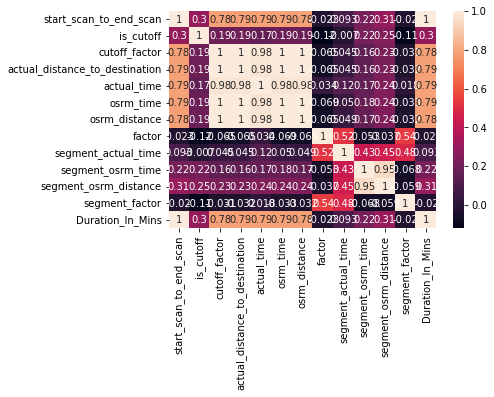

In [34]:
sns.heatmap(work_df.corr(), annot=True)
plt.show()

In [35]:
# Comparision & Visulization of distance fields

In [36]:
# Mising Values & Outlier Treatment 

### Observations

# Summary & Recommendations